<a href="https://colab.research.google.com/github/themikepeng/projecttitanicdecisiontrees/blob/main/decision_trees_project_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Decision Tree

#Project Decision Tree

##Drive Setup

#Drive Setup
Ensure that this notebook and all data files are saved under the `Colab Notebooks/decision trees/` folder!

You must follow the steps to mount your Google Drive so that your data file(s) can be used:


*   Run the cell below
*   Go to the URL given and sign into your Google account
*   Copy and enter the authorization code into the textbox under the cell



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Imports

In [5]:
import sys
!{sys.executable} -m pip install pydot

import io
from collections import Counter

import numpy as np
import scipy.io
import sklearn.model_selection
import sklearn.tree
from numpy import genfromtxt
from scipy import stats
from sklearn.base import BaseEstimator, ClassifierMixin

import pydot
import matplotlib.pyplot as plt
import pandas as pd

eps = 1e-5  # a small number

# Intro to the Titanic dataset

**Goal: we want to implement a decision tree model that can predict whether a passenger on the Titanic survived or didn't survive**
*  The Titanic dataset is split between training data and test data
  *  The training data will then be further split into training and validation sets
  *  The test data does not contain the true class labels: we don't know if these passengers survived or not
  *  It is good practice to not predict on the test set until we've finalized our model!
*  We will then train an instance of this decision tree on the training set (sample points), and ensure that it is generalizable to the validation set
*  Finally, we will make our predictions on the test set

*  The Titanic dataset has the following fields:

1. survived: the label we want to predict; 1 indicates the person survived, whereas 0 indicates the person
died
2. pclass: Measure of socioeconomic status; 1 is upper, 2 is middle, 3 is lower
4. sex: Male/female
3. age: Fractional if less than 1
5. sibsp: Number of siblings/spouses aboard the Titanic
6. parch: Number of parents/children aboard the Titanic
7. ticket: Ticket number
8. fare: Fare
9. cabin: Cabin number
10. embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

Let's start with some warmup exercises, which will go over Python concepts that are useful for our implementation:

# Warmup A: Break, Continue

In a `for` or `while` loop:
*   The `break` statement terminates the loop that contains it
*   The `continue` statement skips the rest of the code for the current iteration, and continues onto the next iteration

Note: if used in a nested loop, `break` and `continue` only affect the innermost loop!

Examples: 

In [6]:
hello = "Hello World"

print("First word:")
for c in hello:
    if c == " ":
        break
    print(c)

print("\nNo vowels:")
for c in hello:
    if c in ['a', 'e', 'i', 'o', 'u']:
        continue
    print(c)

First word:
H
e
l
l
o

No vowels:
H
l
l
 
W
r
l
d


## Try it
Using `break` and `continue`, write a function `wacky_sum` that scans an array of integers from left to right, taking a running total of elements that are **not** a multiple of 10, and stopping when encountering a negative element

In [18]:
def wacky_sum(nums):
    tot = 0

    return ...

#-------------------------------------------------------------------------------------------------
#Test with the following doctest test vectors.
#DO NOT EDIT THE TEST CODE!!!!
#Even changing the spacing can cause errors.
#The test code will automatically execute when you run the cell.
#You should test all your combination of outputs but your code at least must pass these exact tests.
#If your code fails, you will see a description in the console cell.
#If your code passes, you will see the message: "TestResults(failed=0, attempted=6)"
import doctest


"""
  >>> print(wacky_sum([]))
  0
  >>> print(wacky_sum([-1]))
  0
  >>> print(wacky_sum([200]))
  0
  >>> print(wacky_sum([8, 7, 7, 5, 10, 6, -8, 5]))
  33
  >>> print(wacky_sum([0, 5, 10, 15, 20, 25, 30, -35, 40, -45, 50]))
  45
  >>> print(wacky_sum([2017, 2018, 2019, -2020, 2021, -2022]))
  6054
"""
doctest.testmod()

**********************************************************************
File "__main__", line 3, in __main__
Failed example:
    print(wacky_sum([]))
Expected:
    0
Got:
    Ellipsis
**********************************************************************
File "__main__", line 5, in __main__
Failed example:
    print(wacky_sum([-1]))
Expected:
    0
Got:
    Ellipsis
**********************************************************************
File "__main__", line 7, in __main__
Failed example:
    print(wacky_sum([200]))
Expected:
    0
Got:
    Ellipsis
**********************************************************************
File "__main__", line 9, in __main__
Failed example:
    print(wacky_sum([8, 7, 7, 5, 10, 6, -8, 5]))
Expected:
    33
Got:
    Ellipsis
**********************************************************************
File "__main__", line 11, in __main__
Failed example:
    print(wacky_sum([0, 5, 10, 15, 20, 25, 30, -35, 40, -45, 50]))
Expected:
    45
Got:
    Ellipsis
***********

TestResults(failed=6, attempted=6)

# Warmup B: List Comprehension
A list comprehension is a way to define a new list or 2D array based on an existing list, as a more elegant alternative to using an explicit `for` loop

A traditional `for` loop would have the format

In [8]:
'''
list2 = []
for (item) in list1:
    if (conditional):
        list2.append((operation))
return list2
'''

'\nlist2 = []\nfor (item) in list1:\n    if (conditional):\n        list2.append((operation))\nreturn list2\n'

While a list comprehension would have the format

`list2 = [(operation) for (item) in list1 if (conditional)]`

Note that the if conditional is optional!

For example, if we wanted to find the lengths of all the elements in a list that start with 'a', we could use the following list comprehension:

In [9]:
animals = ['anteater', 'quail', 'moose', 'ape', 'dolphin']
lens = [len(str) for str in animals if str[0] == 'a']
lens

[8, 3]

### Try it
Write a function `apply_evenly()` that takes in a function `func` and applies it to every other element (all even-indexed elements) in the list `list1`

In [10]:
def apply_evenly(func, list1):
    return ...

    #alternative solution: return [func(list1[i]) for i in range(0, len(list1), 2)]

#-------------------------------------------------------------------------------------------------
#Test with the following doctest test vectors.
#DO NOT EDIT THE TEST CODE!!!!
#Even changing the spacing can cause errors.
#The test code will automatically execute when you run the cell.
#You should test all your combination of outputs but your code at least must pass these exact tests.
#If your code fails, you will see a description in the console cell.
#If your code passes, you will see the message: "TestResults(failed=0, attempted=5)"
import doctest

rand = [8, 5, 5, 1, 2, 3]
langs = ['Python', 'Java', 'C', 'C++', 'HTML', 'Javascript']

def lower2(str):
    return str.lower()

def sq(x):
    return x ** 2

def spread4(x):
    return (np.ones(4) * x).tolist()


"""
  >>> print(apply_evenly(len, langs))
  [6, 1, 4]
  >>> print(apply_evenly(len, animals))
  [8, 5, 7]
  >>> print(apply_evenly(lower2, langs))
  ['python', 'c', 'html']
  >>> print(apply_evenly(sq, rand))
  [64, 25, 4]
  >>> print(np.array(apply_evenly(spread4, rand)))
  [[8. 8. 8. 8.]
   [5. 5. 5. 5.]
   [2. 2. 2. 2.]]
"""
doctest.testmod()

**********************************************************************
File "__main__", line 3, in __main__
Failed example:
    print(apply_evenly(len, langs))
Expected:
    [6, 1, 4]
Got:
    Ellipsis
**********************************************************************
File "__main__", line 5, in __main__
Failed example:
    print(apply_evenly(len, animals))
Expected:
    [8, 5, 7]
Got:
    Ellipsis
**********************************************************************
File "__main__", line 7, in __main__
Failed example:
    print(apply_evenly(lower2, langs))
Expected:
    ['python', 'c', 'html']
Got:
    Ellipsis
**********************************************************************
File "__main__", line 9, in __main__
Failed example:
    print(apply_evenly(sq, rand))
Expected:
    [64, 25, 4]
Got:
    Ellipsis
**********************************************************************
File "__main__", line 11, in __main__
Failed example:
    print(np.array(apply_evenly(spread4, rand)))

TestResults(failed=5, attempted=5)

# Warmup C: Multidimensional Select

Suppose we have a data matrix `wellness` that contains results of a wellness survey on students, with the following feature labels (in order):
*  name
*  sleep: the hours of sleep the student got the previous night
*  meals: how many meals the student ate the previous day
*  fruit: whether the student ate any fruit the previous day (1 for "yes", 0 for "no")

Note that each row represents one student (sample point), and each column represents a feature!

We can use the row and column index to select or assign elements in a 2D Numpy ndarray (eg. a data matrix):

In [11]:
wellness = np.array([["Alice", 9, 3, 1], ["Bob", 7, 3, 0], ["Sam", 8, 3, 1], ["Tina", 6, 2, 1]])
feature_labels = ["name", "sleep", "meals", "fruit"]
print("Our ndarray: \n", wellness)

#select from row 0, column 3: 
elem = wellness[0, 3]
print("\nDid Alice have fruit yesterday?\n", elem)

#update row 2, column 1
wellness[2, 1] = 9
print("\nSam says he actually slept 9 hours yesterday: \n", wellness)

Our ndarray: 
 [['Alice' '9' '3' '1']
 ['Bob' '7' '3' '0']
 ['Sam' '8' '3' '1']
 ['Tina' '6' '2' '1']]

Did Alice have fruit yesterday?
 1

Sam says he actually slept 9 hours yesterday: 
 [['Alice' '9' '3' '1']
 ['Bob' '7' '3' '0']
 ['Sam' '9' '3' '1']
 ['Tina' '6' '2' '1']]


We can also select an entire row or column by index to get a 1D array:

In [12]:
#select row 3
row3 = wellness[3, :]
print("Tina: \n", row3)

#select column 1
col1 = wellness[:, 1]
print("sleep: \n", col1)

Tina: 
 ['Tina' '6' '2' '1']
sleep: 
 ['9' '7' '9' '6']


Using a condition in the select statement will give us a filtered 2D array:

In [13]:
#select rows where column 1 is less than '8'
lessthan8 = wellness[wellness[:, 1] < '8']
print("Less than 8 hours of sleep: \n", lessthan8)

Less than 8 hours of sleep: 
 [['Bob' '7' '3' '0']
 ['Tina' '6' '2' '1']]


The `shape()` function of a ndarray gives us a tuple of array dimensions! Thus, for a 2D array:
*  `shape[0]` gives us the number of rows (sample points)
*  `shape[1]` gives us the number of columns (features)

In [14]:
print("Number of students:", wellness.shape[0])
print("Number of features:", wellness.shape[1])
print("\n")

#print all names
for i in range(0, wellness.shape[0]):
    print(wellness[i, 0])
print("\n")

#print all feature labels
for j in range(0, wellness.shape[1]):
    print(feature_labels[j])

Number of students: 4
Number of features: 4


Alice
Bob
Sam
Tina


name
sleep
meals
fruit


### Try it
Use a select statement to find the names of all the students who had at least 3 meals yesterday

In [15]:
names = ...

#-------------------------------------------------------------------------------------------------
#Test with the following doctest test vectors.
#DO NOT EDIT THE TEST CODE!!!!
#Even changing the spacing can cause errors.
#The test code will automatically execute when you run the cell.
#You should test all your combination of outputs but your code at least must pass these exact tests.
#If your code fails, you will see a description in the console cell.
#If your code passes, you will see the message: "TestResults(failed=0, attempted=1)"
import doctest
"""
  >>> print(names)
  ['Alice' 'Bob' 'Sam']
"""
doctest.testmod()

**********************************************************************
File "__main__", line 3, in __main__
Failed example:
    print(names)
Expected:
    ['Alice' 'Bob' 'Sam']
Got:
    Ellipsis
**********************************************************************
1 items had failures:
   1 of   1 in __main__
***Test Failed*** 1 failures.


TestResults(failed=1, attempted=1)

# Warmup D: Information Gain Calculation

Recall the equations for calculating information gain:

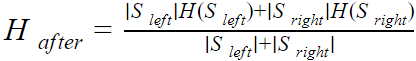

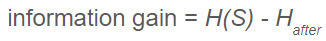

Where:
*  S<sub>left</sub> is the set of class labels belonging to the left child post-split, represented by `left` below
*  S<sub>right</sub> is the set of class labels belonging to the right child post-split, represented by `right` below
*  S is the set of all class labels belonging to the current node, represented by `y` below
*  |S| is the number of elements in **any** set of class labels S — for our purposes, we'll use the `.size` attribute of `numpy.ndarray` (the three sets mentioned above will be represented by ndarrays)
*  H(S) is the entropy of **any** set of class labels S — which, for now, will be found by calling the function `entropy0` on S

Fill in the information gain calculation within `igcalc()`; this calculation will be used later in our `DecisionTree` implementation:

In [16]:
#This is actually the gini impurity function, which has similar behavior to 
#the entropy function, and is sometimes used in place of entropy in decision
#trees; however, we will soon implement the actual entropy function
def entropy0(labels, base=None):
    value,counts = np.unique(labels, return_counts=True)
    eq = 0
    for cnt in counts:
        p_i = cnt / labels.size
        eq += p_i * (1 - p_i)
    return eq

def igcalc (left, right, y):
    calc = ...
    return calc

#-------------------------------------------------------------------------------------------------
#Test with the following doctest test vectors.
#DO NOT EDIT THE TEST CODE!!!!
#Even changing the spacing can cause errors.
#The test code will automatically execute when you run the cell.
#You should test all your combination of outputs but your code at least must pass these exact tests.
#If your code fails, you will see a description in the console cell.
#If your code passes, you will see the message: "TestResults(failed=0, attempted=6)"
import doctest

left1, right1, y1 = np.array([0, 1]), np.array([0, 1]), np.array([0, 1, 0, 1])
left2, right2, y2 = np.array([0, 0]), np.array([1, 1]), np.array([0, 1, 0, 1])

left3, right3, y3 = np.array([0, 0, 1, 0]), np.array([1, 1, 1, 2]), np.array([0, 0, 1, 0, 1, 1, 1, 2])
left4, right4, y4 = np.array([0, 0, 2]), np.array([1, 0, 1, 1, 1]), np.array([0, 0, 1, 0, 1, 1, 1, 2])

left5, right5, y5 = np.array([0, 0, 0]), np.array([1, 1, 1, 1, 2]), np.array([0, 0, 1, 0, 1, 1, 1, 2])
left6, right6, y6 = np.array([0, 0, 0, 2]), np.array([1, 1, 1, 1]), np.array([0, 0, 1, 0, 1, 1, 1, 2])

"""
  >>> print(igcalc(left1, right1, y1))
  0.0
  >>> print(igcalc(left2, right2, y2))
  0.5
  >>> print(igcalc(left3, right3, y3))
  0.21875
  >>> print(igcalc(left4, right4, y4))
  0.2270833333333333
  >>> print(igcalc(left5, right5, y5))
  0.39375
  >>> print(igcalc(left6, right6, y6))
  0.40625
"""
doctest.testmod()

**********************************************************************
File "__main__", line 3, in __main__
Failed example:
    print(igcalc(left1, right1, y1))
Expected:
    0.0
Got:
    Ellipsis
**********************************************************************
File "__main__", line 5, in __main__
Failed example:
    print(igcalc(left2, right2, y2))
Expected:
    0.5
Got:
    Ellipsis
**********************************************************************
File "__main__", line 7, in __main__
Failed example:
    print(igcalc(left3, right3, y3))
Expected:
    0.21875
Got:
    Ellipsis
**********************************************************************
File "__main__", line 9, in __main__
Failed example:
    print(igcalc(left4, right4, y4))
Expected:
    0.2270833333333333
Got:
    Ellipsis
**********************************************************************
File "__main__", line 11, in __main__
Failed example:
    print(igcalc(left5, right5, y5))
Expected:
    0.39375
Got:
    

TestResults(failed=6, attempted=6)

# Helpful Functions
We are now ready to implement our `DecisionTree` class! Each section below will walk through the implementation of a function or method, making references to the following simple NumPy and SciPy functions as needed:
*   ndarray transpose https://numpy.org/doc/stable/reference/generated/numpy.ndarray.T.html
*ndarray shape https://numpy.org/doc/stable/reference/generated/numpy.ndarray.shape.html
*   numpy hstack https://numpy.org/doc/stable/reference/generated/numpy.hstack.html
*   numpy unique https://numpy.org/doc/stable/reference/generated/numpy.unique.html
*   numpy where https://numpy.org/doc/stable/reference/generated/numpy.where.html
*numpy linspace https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
*numpy nan_to_num https://numpy.org/doc/stable/reference/generated/numpy.nan_to_num.html
*numpy ones, zeros https://numpy.org/doc/stable/reference/generated/numpy.ones.html https://numpy.org/doc/stable/reference/generated/numpy.zeros.html
*  numpy unravel_index https://numpy.org/doc/stable/reference/generated/numpy.unravel_index.html
*   collections.Counter and most_common() https://docs.python.org/2/library/collections.html
*   scipy.stats.mode https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mode.html
  *   scipy ModeResult https://www.kite.com/python/docs/scipy.stats.mstats_basic.ModeResult
*   scipy.stats.entropy https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.entropy.html


# Part A: preprocessing
A function to preprocess our data matrix into something our decision tree can use

Parameters:
*   `data` is a numpy ndarray: the **full** data matrix with sample points as rows, and predictive features (fields 2 through 10) as columns
*   `fill_mode` is a boolean (default True) for whether we want to fill in each missing value with the mode of its column
*   `min_freq` is an integer (default 10): threshold for the minimum number of times a category must appear before we'd want to one-hot encode it into a binary variable
*   `onehot_cols` is an array with the indeces of all the categorical variables in `data` to one-hot encode

Fill in the `preprocess()` function as described:


1.   Assign missing values (look for values that are `b''`) in the `data` table to `b'-1'` temporarily
2.   Declare `onehot_encoding` and `onehot_features` to be empty arrays
3.   Iterate through every `col` in `onehot_cols`

  a. Pull column `col` from `data` (recall that `onehot_cols` is an array of column indices), and use it to intialize a `Counter()` called `counter`

  b. Iterate through every `term` (`(category, count)` pair), in descending order by count (hint: check the `most_common()` method of `counter`)

  *   Check if the `term`'s category represents a missing value (hint: what did you replace missing values with earlier?) if so, continue to next iteration
  *   Check if the `term`'s count is below our threshold; if so, break the loop
  *   Append `term`'s category to `onehot_features`, and a binary array to `onehot_encoding`, as described in the one-hot encoding process (hint: check `data`'s `col`-th column to get a boolean array, then cast it as an array of floats to get a binary array)

  c. set `data`'s `col`-th column to `'0'` as it won't be used anymore
4.   Convert `onehot_encoding` to a numpy array and transpose it; our binary arrays are now binary columns
5.   Cast `data` as a numpy array of floats, then combine its columns with those of `onehot_encoding` (hint: check the `hstack()` function of numpy)
6.   Check if `fill_mode` is enabled; if so, iterate through every column index `i` of `data`
  
  a.   Find the mode of column `i` for all non-missing values of the column; use the condition `(data[:, i] < -1 - eps) + (data[:, i] > -1 + eps)` to select rows of `data` where column `i` is **not** missing, then extract column `i` from the resulting table (hint: use `stats.mode()` from scipy, extract the mode from the ModeResult that it returns, and take element 0)
  
  b.   Assign the mode to **missing** values of column `i`; use a similar process as above to select missing values, but use the condition `(data[:, i] > -1 - eps) * (data[:, i] < -1 + eps)` instead
7.   return `data, onehot_features`


# Part B: DecisionTree constructor

Creates a decision tree node

Parameters:
*   `max_depth` is an int (default 3) for how many levels of decision nodes we want in our current `DecisionTree` (a leaf would have `max_depth` 0)
*   `feature_labels` is an array of strings (default None) for the names of our features

Initialize the following based on the arguments passed in:
*   `self.max_depth`
*   `self.features`

Initialize the following as an empty decision tree node:
*   `self.left, self.right`
*   `self.split_idx, self.thresh`
*   `self.data, self.labels, self.pred`

Note that the first four will be assigned in decision nodes, while the last three will be assigned in leaf nodes



# Part C: entropy
Calculates the entropy from a set of class labels

Parameters:
*   `labels` is a list of class labels (corresponding to points)
*   `base` is an int (default None): the base to be used for the log function within entropy (None corresponds to natural log in `stats.entropy()`)

Fill in the `entropy1()` function as described:
1.   Get the counts for each class in `labels` (hint: check the `unique()` function of numpy)
2.   Return the entropy calculated on the counts; you may use `stats.entropy() ` from scipy

# Part D: information gain
Calculates the information gain from splitting points on feature column `X` and value `thresh`

Parameters:
*   `X` is an array of numeric values: the column of our data matrix that corresponds to the feature that we want to try splitting on
*   `y` is an array of class labels (corresponding to points in data matrix)
*   `thresh` is a numeric value: the value that we want to try splitting on

Fill in the `information_gain()` function as described:
1.   Find the two lists of **class labels** for the left and right children after the split, and create numpy arrays from these lists (hint: use list comprehensions with conditions `X[i] < thresh`, `X[i] >= thresh` as conditions)
2.   Calculate the information gain from the left and right class labels like in **the warmup**, but with `entropy1()` in place of `entropy0()`
3.   Return the information gain

# Part E: split test
Given a feature and split value, splits sample points and sample point indices in two

Parameters:

*   `X` is a numpy ndarray: the data matrix with sample points in the current node as rows, and predictive features (fields 2 through 10) as columns
*   `idx` is an int: the column index of the feature that we want to split on
*   `thresh` is a numeric value: the value that we want to split on

Fill in the `split_test()` function as described:
1.   Define `idx0`, `idx1` to be sets of sample point indices (rows in `X`) for the left and right children: ie. one where the values of feature `idx` are less than `thresh`, and another where they are greater than or equal to `thresh` (hint: check the `where()` function of numpy; provide a condition only and get the 0-th element of the function call)
2.   Using the two sets of indices above, split `X` into two ndarrays `X0`, `X1`: one for the left child, and one for the right child
3.   Return `X0`, `idx0`, `X1`, `idx1` in that order



# Part F: split
Splits a set of data points **and** a set of class labels in two, given a feature and split value

Parameters:
*   `X` is a numpy ndarray: the data matrix with sample points in the current node as rows, and predictive features (fields 2 through 10) as columns
*   `y` is a list of class labels (corresponding to points)
*   `idx` is an int: the column index of the feature that we want to split on
*   `thresh` is a numeric value: the value that we want to split on

Fill in the `split()` function as described:
1.   Call `split_test()` to get `X0`, `idx0`, `X1`, `idx1` as described in the previous part
2.   Use `idx0`, `idx1` to split `y` into two lists `y0` and `y1`
3.   Return `X0`, `y0`, `X1`, `y1` in that order

# Part G: fit
Recursively grows a decision tree given a set of data points and a set of class labels

Parameters:
*   `X` is a numpy ndarray: the data matrix with sample points in the current node as rows, and predictive features (fields 2 through 10) as columns
*   `y` is a list of class labels (corresponding to points)

Fill in the `fit()` function as described:

1.   Check if the `self.max_depth` of the tree is greater than 0

Fill in the following under the main `if` clause
2.   Create an empty array `gains` to store calculated information gains
3.   Use list comprehension to create a 2D array: for each feature index `j`, use linear interpolation with `num=10` to find a 1D array of split values we'd like to try for that feature (hint #1: you can use `linspace()` in numpy to create the 1D array) (hint #2: use `X.shape[1]` to get the total number of features) 

*   Linear interpolation in this case: Take the minimum and maximum sample values of column `j`, x<sub>j-min</sub> and x<sub>j-max</sub>, and try `num` evenly spaced numbers over the interval [x<sub>j-min</sub> + eps, x<sub>j-max</sub> - eps] where eps is a very small number (hint #1: use `np.min()` and `np.max()`) (hint #2: `eps` is already defined)
*   Finally, create a numpy array from the 2D array and assign it to `thresh_list`
4.  For each feature index `j`:

  a.  Use list comprehension to create a 1D array: for each value `t` in row `j` of `thresh_list`, call `information_gain()` on column `j` of `X`, `y`, and `t`

  b.  Append the 1D array to `gains`
5.  Convert `gains` to a numpy array, and call `np.nan_to_num()` on `gains` to replace NaN values with 0.0
6.  Find the feature index and index of the threshold value that corresponds to the maximum information gain in `gains`, and assign them to `self.split_idx, thresh_idx`
*   `gains` is a 2D array, but `np.argmax()` returns the 1D coordinate of the maximum gain along a **flattened** array! We need the 2D coordinates from `gain`, which can be found using `np.unravel_index(np.argmax(gains), gains.shape)`
7.  Use `self.split_idx, thresh_idx` to find the threshold value in `thresh_list` that corresponds to the maximum gain; assign the value to `self.thresh` (hint: `thresh_list` is indexed the same way as `gains`)
8.  Call `split()` to split our data point set and class label set in two: `X0, y0, X1, y1`
9.  Using an `if` statement to check that both `X0` and `X1` are not empty: (this will dictate that the current node be a decision node)

  a.  Construct two `DecisionTrees`, one for the left and one for the right child, and assign them to `self.left` and `self.right` (hint: what should you pass into the constructor for `max_depth` and `feature_labels`? How deep do you want a child to be in relation to `self.max_depth`?)

  b.  Make a recursive call to `fit()`, for both `self.left` and `self.right`, passing in their respective data point sets and class label sets
10.  Under `else`: (this will dictate a leaf node since either `X0`or `X1` is empty; we cannot split further)

  a.  Set `self.max_depth` to 0

  b.  Store `X, y` in `self.data, self.labels`

  c.  Assign `self.pred`, the final prediction of the node, to the mode of `y` (hint: use `stats.mode()` from scipy, extract the mode from the ModeResult that it returns, and take element 0)

Fill in the following under the main `else` clause (this will dictate a leaf node since we have reached the max depth)
11.  As above, store `X, y` in `self.data, self.labels`, then assign `self.pred`, the final prediction of the node, to the mode of `y`

Finally, outside of the `if-else` statements, return the current node `self`

# Part H: predict
Recursively traverses a decision tree to predict class labels for a given set of data points

Parameters:
*   `X` is a numpy ndarray: the data matrix with sample points in the current node as rows, and predictive features (fields 2 through 10) as columns

Fill in the `predict()` function as described:
1.  Check if `self` is a leaf node (what would `max_depth` be?)
  
  a.  Return a 1D numpy array predicting `self.pred` for each sample point (hint #1: use the `*` operator to broadcast `self.pred` onto an array of ones the size of n, where n is the number of sample points) (hint #2: check `ones()` of numpy)
2.  Else

  a.  Call `split_test()` to split our data point set and index set in two: `X0, idx0, X1, idx1`

  b.  Define `yhat` to be a 1D numpy array with a zero for each sample point (hint: check `zeros()` of numpy)

  c.  Assign the values of `yhat` indexed by `idx0`, by recursively predicting on `X0` using the left child node
  
  d.  Repeat for `idx1` and `X1` using the right child node

  e.  Return the node's predictions `yhat`



In [1]:
class DecisionTree:
    #Creates a decision tree node
    def __init__(self, max_depth=3, feature_labels=None):
        ...
        # for non-leaf nodes

        # for non-leaf nodes

        # for leaf nodes

    #Calculates the entropy from a set of class labels
    global entropy1
    def entropy1(labels, base=None):
        #get counts for each class label in labels; find and return entropy
        return ...
    
    @staticmethod
    #Calculates the information gain from splitting points on feature column X and value thresh
    def information_gain(X, y, thresh):
        #condition X against thresh to split y into left and right child sets

        #calculate and return information gain from equation

        return ...

    #Splits a set of data points and a set of class labels in two, given a feature and split value
    def split(self, X, y, idx, thresh):
        #call split_test, then use the two sets of indices to split y into two sets

        #return X0, y0, X1, y1
        return ...

    #Given a feature and split value, splits sample points and sample point indices in two
    def split_test(self, X, idx, thresh):
        #get two sets of sample point indices by conditioning column idx of X against thresh

        #split X into two sets using the sample point indices above
        #return X0, idx0, X1, idx1

        return ...

    #Recursively grows a decision tree given a set of data points and a set of class labels
    def fit(self, X, y):
        #check self.max_depth

            #create gains array

            #build thresh_list: values to try for each feature thresholding with a linear interpolation of 10 values; 
            #including logic to prevent thresholding on exactly the minimum or maximum values
            #which may not lead to any meaningful node splits

            #compute info gain for all single-dimension splits; convert to np array and remove NaNs

            #find optimal feature index and index of threshold value using argmax and unravel_index

            #extract the optimal threshold value from thresh_list

            #call split() to get two sets of data pts and class labels

            #check that neither X0 and X1 are empty (decision node): recursively build and fit left/right children

            #else (leaf node): set max_depth to 0, store X and y, and assign mode of y to be the final pred

        #else (leaf node): max_depth is 0, store X and y, and assign mode of y to be the final pred

        #return current node
        return ...

    #Recursively traverses a decision tree to predict class labels for a given set of data points
    def predict(self, X):
        #check if leaf node: return pred for all sample pts

        #else (decision node): call split_test() to split into two sets of sample pts and sample pt indices;
        #create yhat = array of 0's;
        #recursively predict on the two sets using the left and right children and insert into yhat

            #return all predictions
            return ...
        
#A function to preprocess our data matrix into something our decision tree can use
def preprocess(data, fill_mode=True, min_freq=10, onehot_cols=[]):
    # Temporarily assign -1 to missing data

    # Hash the columns (used for handling strings)

        #initialize a Counter from data column, to find the most common categorical terms and their frequencies

            #ignore missing terms and only encode category if frequency is above threshold

            #keep track of feature-column correspondence, then one-hot encode into binary arrays
            #neutralize original column
            #transpose to get binary columns and add them to data matrix

    # Replace missing data with the mode value. We use the mode instead of
    # the mean or median because this makes more sense for categorical
    # features such as gender or cabin type, which are not ordered.

            #get values of column i that are not close to -1
            #get the mode of the above using scipy.stats.mode and accessing ModeResult
            #assign mode to values of column i that are close to -1

    #return data, onehot_features
    return ...


def evaluate(clf):
    print("Cross validation", sklearn.model_selection.cross_val_score(clf, X, y))
    if hasattr(clf, "decision_trees"):
        counter = Counter([t.tree_.feature[0] for t in clf.decision_trees])
        first_splits = [(features[term[0]], term[1]) for term in counter.most_common()]
        print("First splits", first_splits)

# Preprocessing
After implementing all the decision tree functions, run the cell below to preprocess our Titanic training and test data:

In [ ]:
#import titanic dataset files as training and test data
path_train = '/content/drive/My Drive/Colab Notebooks/decision trees/titanic_training.csv'
data = genfromtxt(path_train, delimiter=',', dtype=None)

path_test = '/content/drive/My Drive/Colab Notebooks/decision trees/titanic_testing_data.csv'
test_data = genfromtxt(path_test, delimiter=',', dtype=None)

#define our set of class labels from imported test data (0 = Died, 1 = Survived)
y_titanic = data[1:, 0]
class_names_titanic = ["Died", "Survived"]

#for class labels AND preprocessed data, use labeled_idx to keep only rows where class labels are present
labeled_idx = np.where(y_titanic != b'')[0]
y_titanic = np.array(y_titanic[labeled_idx], dtype=np.int)

#preprocess training data and test data
print("Preprocessing the titanic dataset")
X_titanic, onehot_features = preprocess(data[1:, 1:], onehot_cols=[1, 5, 7, 8])
X_titanic = X_titanic[labeled_idx, :]
Z_titanic, _ = preprocess(test_data[1:, :], onehot_cols=[1, 5, 7, 8])

#check that our two sets have same # of columns
#define list of feature names
assert X_titanic.shape[1] == Z_titanic.shape[1]
features_titanic = list(data[0, 1:]) + onehot_features

# Before using our `DecisionTree`:


*   Split our training data into training and validation sets
  *  Randomly assign 20% of data to validation set, keeping 80% in training set; this is commonly called the "80/20" split
*  Print the names of our features, before and after the preprocessing of our data matrices
  *  Recall that we one-hot encoded while preprocessing!
*  Run a "dummy" constant classifier on training set, which predicts 0 ("didn't survive") for each passenger
  *  We'll refer back to this as a baseline accuracy



In [ ]:
#split training into 80% training, 20% validation; use random state to keep it deterministic for our purposes
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X_titanic, y_titanic, test_size=0.2, random_state=49)

#print train, test, train/val sizes
print("Total training size:", X_titanic.shape[0])
print("Total test size:", Z_titanic.shape[0])
print("Training/validation sizes:", X_train.shape[0], X_val.shape[0])

#print our feature labels before and after one-hot encoding
print("\n\nFeatures before one-hot encoding:", list(data[0, 1:]))
print("Features after one-hot encoding:", features_titanic)

#constant classifier which always predicts 0
print("\n\nAccuracy of constant classifier:", 1 - np.sum(y_titanic) / y_titanic.size)

# Training our `DecisionTree`
We're finally ready to apply our `DecisionTree` to the training set! Run the cell below to:


*   Create an instance of `DecisionTree` and grow it on our set of training points
*  Use the `DecisionTree` to predict on the training and validation sets, and obtain the training and validation accuracies
  *  The training accuracy is how well our decision tree is able to model the dataset that it was constructed on
  *  The validation accuracy is how well it can generalize to predict on data that it hasn't seen yet
*  Check that training and validation accuracies match the staff accuracies (which should be the case if `DecisionTree` was implemented as described)



In [ ]:
#create a DecisionTree instance and train it on the training set
dt = DecisionTree(max_depth=8, feature_labels=features_titanic)
dt.fit(X_train, y_train)

#use it to predict on our training set and validation set
train_pred = dt.predict(X_train)
val_pred = dt.predict(X_val)
train_acc = 1 - np.count_nonzero(train_pred - y_train) / y_train.size
val_acc = 1 - np.count_nonzero(val_pred - y_val) / y_val.size
print("Training Accuracy:", train_acc)
print("Validation Accuracy:", val_acc)

#-------------------------------------------------------------------------------------------------
#Test with the following doctest test vectors.
#DO NOT EDIT THE TEST CODE!!!!
#Even changing the spacing can cause errors.
#The test code will automatically execute when you run the cell.
#You should test all your combination of outputs but your code at least must pass these exact tests.
#If your code fails, you will see a description in the console cell.
#If your code passes, you will see the message: "TestResults(failed=0, attempted=2)"
import doctest
"""
  >>> print(train_acc)
  0.8660826032540676
  >>> print(val_acc)
  0.795
"""
doctest.testmod()

# Final Predictions
Once we are satisfied with our validation accuracy, we can make our final predictions on the test set

*   Now that validation is complete, we should train on our **entire** training set (including points previously assigned to validation) before making test predictions
*   Predict on the test set, and ensure that the test predictions match the staff predictions
  *  Recall that we don't have the true class labels for the test set, so we cannot obtain a test accuracy! However, a test accuracy would be used in practice as a final evaluation of the model's performance



In [ ]:
#train on entire training set
dt.fit(X_titanic, y_titanic)
test_pred = dt.predict(Z_titanic)

#-------------------------------------------------------------------------------------------------
#Test with the following doctest test vectors.
#DO NOT EDIT THE TEST CODE!!!!
#Even changing the spacing can cause errors.
#The test code will automatically execute when you run the cell.
#You should test all your combination of outputs but your code at least must pass these exact tests.
#If your code fails, you will see a description in the console cell.
#If your code passes, you will see the message: "TestResults(failed=0, attempted=1)"
import doctest
"""
  >>> print(test_pred)
  [1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1.
   0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0.
   1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0.
   1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1.
   1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0.
   0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0.
   0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.
   0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0.
   0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1.
   1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
   0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0.]
"""
doctest.testmod()

# Bonus: Visualization

Run the following code to visualize the decision tree trained above— but limited to depth 3, for visibility

*   The PDF file will show up in `/Colab Notebooks/decision trees/test-output/`
*  Each decision node shows the name of the feature (corresponding to `self.split_idx`), and the threshold value the feature is split on `self.thresh`
*  Each leaf node shows its final prediction `self.pred`
*  It should look like: ![](https://drive.google.com/uc?export=view&id=1PE9UNo-df4d7KGacACFaiKOLWT9hOGBK)



In [ ]:
!{sys.executable} -m pip install graphviz
from graphviz import Digraph
import os

tree_vis = Digraph(comment='Titanic decision tree')
i = 0

#recursive function that walks through a tree and builds the Digraph node by node (either threshold or class label)
def walk(DT):
    global i
    #leaf node
    if DT.max_depth == 0:
        #nodenum = unique label for every node
        nodenum = str(i)
        tree_vis.node(nodenum, 'class: ' + str(DT.pred))
        i += 1
        return nodenum
    #decision node; recursive calls
    else:
        #print feature to split on, and threshold
        label = str(DT.features[DT.split_idx]) + ', threshold ' + str(DT.thresh)
        nodenum = str(i)
        i += 1
        tree_vis.node(nodenum, label)
        tree_vis.edge(nodenum, walk(DT.left))
        tree_vis.edge(nodenum, walk(DT.right))
        return nodenum

#create and train the depth 3 DecisionTree
dt3 = DecisionTree(max_depth=3, feature_labels=features_titanic)
dt3.fit(X_train, y_train)

walk(dt3)
#un-comment to print the link between nodes
#print(tree_vis.source)

#delete existing output graph if exists
#render graph
try:
    os.remove('test-output/titanic_3.gv')
except OSError:
    pass

tree_vis.render('/content/drive/My Drive/Colab Notebooks/decision trees/test-output/titanic_3.gv', view=True)